# Digital Kesehatan

## Problem
Data yang akan dianalisa didapatkan dari pasien dimulai dari administrasi, hasil pemeriksaan, monitoring dalam rawat inap maupun rawat jalan, tracking asuransi, estimasi nominal biaya, pembayaran dan pasien kembali pulih. Data tersebut terpusat dalam satu server. Data tersebut dapat divisualisasikan berbagai macam summary sehingga pasien mendapatkan transparansi informasi serta perusahaan mendapatkan insight untuk evaluasi pelayanan.

## Business Problem

## Data Preparation

### Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")

### Read dataframe

In [2]:
df = pd.read_csv("csv/hasil_dummy.csv")
df.head()

,id,date_in,date_out,branch,hospital_care,drug_quantity,admin_price,cogs,payment,review,...,doctor_visit_price,room_price_total,food_price_total,surgery_price_total,lab_price_total,infus_price_total,total_amount,revenue,created_at,is_DBD
0,30591,2020-01-01,2020-01-03,RSMD,Rawat Inap,4,50000,13719597,Asuransi,Netral,...,900000.0,600000,240000.0,15000000,90000,495000.0,17535000,3815403,2024-05-02 09:28:45.585259,False
1,46456,2020-01-01,2020-01-05,RSMA,Rawat Inap,1,50000,14625784,Pribadi,Sangat Tidak Puas,...,1500000.0,1250000,550000.0,15000000,200000,825000.0,19485000,4859216,2024-05-02 09:28:45.585265,False
2,99188,2020-01-01,2020-01-01,RSMD,Rawat Jalan,5,50000,3859519,Pribadi,Sangat Puas,...,300000.0,0,0.0,0,90000,0.0,990000,-2869519,2024-05-02 09:28:45.585267,False
3,23001,2020-01-01,2020-01-05,RSMA,Rawat Inap,2,50000,6086762,Asuransi,Netral,...,1500000.0,1500000,750000.0,4000000,150000,825000.0,8925000,2838238,2024-05-02 09:28:45.585268,False
4,29319,2020-01-01,2020-01-02,RSMS,Rawat Inap,3,50000,3003078,Asuransi,Sangat Tidak Puas,...,600000.0,600000,300000.0,0,200000,330000.0,2305000,-698078,2024-05-02 09:28:45.585268,False


## Exploratory Data Analysis (EDA)

In [3]:
df.sample(5)

,id,date_in,date_out,branch,hospital_care,drug_quantity,admin_price,cogs,payment,review,...,doctor_visit_price,room_price_total,food_price_total,surgery_price_total,lab_price_total,infus_price_total,total_amount,revenue,created_at,is_DBD
3513,30005,2021-05-25,2021-05-30,RSMS,Rawat Inap,4,50000,17339664,Asuransi,Puas,...,1800000.0,900000,300000.0,15000000,195000,990000.0,19535000,2195336,2024-05-02 09:28:45.587105,False
529,59620,2020-03-16,2020-03-17,RSMD,Rawat Inap,3,50000,1012001,Asuransi,Puas,...,600000.0,500000,220000.0,0,0,330000.0,1820000,807999,2024-05-02 09:28:45.585576,False
6849,26073,2022-10-29,2022-11-01,RSMS,Rawat Inap,5,50000,4317132,Pribadi,Puas,...,1200000.0,1200000,600000.0,0,0,660000.0,4260000,-57132,2024-05-02 09:28:45.588881,False
7687,94188,2023-03-17,2023-03-19,RSMA,Rawat Inap,1,50000,9619582,Pribadi,Tidak Puas,...,900000.0,450000,150000.0,8000000,150000,495000.0,10305000,685418,2024-05-02 09:28:45.589320,False
5147,84087,2022-01-29,2022-01-31,RSMD,Rawat Inap,5,50000,4586314,Asuransi,Puas,...,900000.0,450000,150000.0,0,0,495000.0,2595000,-1991314,2024-05-02 09:28:45.587999,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9474 entries, 0 to 9473
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9474 non-null   int64  
 1   date_in              9474 non-null   object 
 2   date_out             9474 non-null   object 
 3   branch               9474 non-null   object 
 4   hospital_care        9474 non-null   object 
 5   drug_quantity        9474 non-null   int64  
 6   admin_price          9474 non-null   int64  
 7   cogs                 9474 non-null   int64  
 8   payment              9474 non-null   object 
 9   review               9474 non-null   object 
 10  patient_id           9474 non-null   int64  
 11  room_id              9474 non-null   int64  
 12  drug_id              9474 non-null   int64  
 13  doctor_id            9474 non-null   int64  
 14  surgery_id           9474 non-null   int64  
 15  lab_id               9474 non-null   i

In [5]:
# Convert date objects to dates
df['date_in'] = pd.to_datetime(df['date_in'])
df['date_out'] = pd.to_datetime(df['date_out'])
df['created_at'] = pd.to_datetime(df['created_at'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9474 entries, 0 to 9473
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   9474 non-null   int64         
 1   date_in              9474 non-null   datetime64[ns]
 2   date_out             9474 non-null   datetime64[ns]
 3   branch               9474 non-null   object        
 4   hospital_care        9474 non-null   object        
 5   drug_quantity        9474 non-null   int64         
 6   admin_price          9474 non-null   int64         
 7   cogs                 9474 non-null   int64         
 8   payment              9474 non-null   object        
 9   review               9474 non-null   object        
 10  patient_id           9474 non-null   int64         
 11  room_id              9474 non-null   int64         
 12  drug_id              9474 non-null   int64         
 13  doctor_id            9474 non-nul

In [7]:
# Menghitung jumlah NaN atau nilai yang kosong
print("Missing Values")
print(df.isnull().sum())

#Check for missing values Percentage
print("\nMissing Values Percentage")
print(df.isna().sum()/len(df))

Missing Values
id                        0
date_in                   0
date_out                  0
branch                    0
hospital_care             0
drug_quantity             0
admin_price               0
cogs                      0
payment                   0
review                    0
patient_id                0
room_id                   0
drug_id                   0
doctor_id                 0
surgery_id                0
lab_id                    0
patient_name              0
gender                    0
age                       0
room_type              1573
food_price             1573
room_price             1573
drug_brand                0
drug_type                 0
drug_price                0
doctor                    0
doctor_price              0
surgery                3573
surgery_price          3573
lab                    1620
lab_price              1620
drug_price_total          0
days_diff                 0
doctor_visit_price        0
room_price_total          0
food_

In [8]:
# Data Duplicate
df.duplicated().sum()

0

In [9]:
# Grouping columns by data type
cats = []
nums = []
temps = []

for column, dtype in df.dtypes.items():
    if dtype == 'object' or dtype == 'bool':
        cats.append(column)
    elif dtype == 'int64' or dtype == 'float64':
        nums.append(column)
    elif dtype == 'datetime64[ns]':
        temps.append(column)

# Display the grouped columns
print("Categorical columns:", cats)
print("Numerical columns:", nums)
print("Temporal columns:", temps)


Categorical columns: ['branch', 'hospital_care', 'payment', 'review', 'patient_name', 'gender', 'room_type', 'drug_brand', 'drug_type', 'doctor', 'surgery', 'lab', 'is_DBD']
Numerical columns: ['id', 'drug_quantity', 'admin_price', 'cogs', 'patient_id', 'room_id', 'drug_id', 'doctor_id', 'surgery_id', 'lab_id', 'age', 'food_price', 'room_price', 'drug_price', 'doctor_price', 'surgery_price', 'lab_price', 'drug_price_total', 'days_diff', 'doctor_visit_price', 'room_price_total', 'food_price_total', 'surgery_price_total', 'lab_price_total', 'infus_price_total', 'total_amount', 'revenue']
Temporal columns: ['date_in', 'date_out', 'created_at']


In [10]:
#Statistik Deskriptif kolom numerikal
df[nums].describe()

,id,drug_quantity,admin_price,cogs,patient_id,room_id,drug_id,doctor_id,surgery_id,lab_id,...,drug_price_total,days_diff,doctor_visit_price,room_price_total,food_price_total,surgery_price_total,lab_price_total,infus_price_total,total_amount,revenue
count,9474.000000,9474.000000,9474.0,9.474000e+03,9474.000000,9474.000000,9474.000000,9474.000000,9474.000000,9474.000000,...,9474.000000,9474.000000,9.474000e+03,9.474000e+03,9474.000000,9.474000e+03,9474.000000,9474.000000,9.474000e+03,9.474000e+03
mean,55248.223137,2.988600,50000.0,7.620927e+06,4737.500000,2.101119,6.530716,3.010661,1.239814,2.483323,...,206276.124129,3.338400,1.015870e+06,7.472609e+05,323113.785096,5.555204e+06,118739.180916,550835.972134,8.567299e+06,9.463725e+05
std,25759.764978,1.411852,0.0,4.879623e+06,2735.052559,1.377272,3.442636,1.416523,1.156093,1.711970,...,133173.520244,1.971642,5.012932e+05,4.917391e+05,238770.811460,5.632277e+06,71016.554775,325320.989704,6.259934e+06,2.319117e+06
min,10001.000000,1.000000,50000.0,1.000452e+06,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,40000.000000,0.000000,2.500000e+05,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,3.400000e+05,-4.579823e+06
25%,33103.000000,2.000000,50000.0,3.642624e+06,2369.250000,1.000000,4.000000,2.000000,0.000000,1.000000,...,100000.000000,2.000000,6.000000e+05,4.000000e+05,150000.000000,0.000000e+00,80000.000000,330000.000000,3.030000e+06,-7.092005e+05
50%,55447.000000,3.000000,50000.0,6.267770e+06,4737.500000,2.000000,7.000000,3.000000,1.000000,2.000000,...,160000.000000,3.000000,9.000000e+05,7.500000e+05,300000.000000,4.000000e+06,90000.000000,495000.000000,7.730000e+06,1.073649e+06
75%,77456.000000,4.000000,50000.0,1.109500e+07,7105.750000,3.000000,10.000000,4.000000,2.000000,4.000000,...,250000.000000,5.000000,1.500000e+06,1.200000e+06,480000.000000,8.000000e+06,195000.000000,825000.000000,1.246500e+07,2.615005e+06
max,99998.000000,5.000000,50000.0,1.749944e+07,9474.000000,4.000000,12.000000,5.000000,3.000000,5.000000,...,550000.000000,6.000000,1.800000e+06,1.800000e+06,900000.000000,1.500000e+07,200000.000000,990000.000000,2.129000e+07,7.465913e+06


In [11]:
# Statistik deskriptif kolom kategorikal
df[cats].describe()

,branch,hospital_care,payment,review,patient_name,gender,room_type,drug_brand,drug_type,doctor,surgery,lab,is_DBD
count,9474,9474,9474,9474,9474,9474,7901,9474,9474,9474,5901,7854,9474
unique,3,2,2,5,9327,2,4,12,4,5,3,5,2
top,RSMS,Rawat Inap,Pribadi,Sangat Puas,Rahmi Marbun,Perempuan,Kelas 3,Tramadol,Vitamin,Kandungan,Kecil,Serologi,False
freq,3205,7901,5515,1948,3,4773,2044,854,2407,1926,2057,1617,8935


In [12]:
# Statistik deskriptif kolom temporal
df[temps].describe()

,date_in,date_out,created_at
count,9474,9474,9474
mean,2021-12-08 16:28:52.742241792,2021-12-11 04:35:15.769474304,2024-05-02 09:28:45.587771392
min,2020-01-01 00:00:00,2020-01-01 00:00:00,2024-05-02 09:28:45.585259
25%,2020-11-28 00:00:00,2020-11-30 06:00:00,2024-05-02 09:28:45.586531072
50%,2021-11-26 00:00:00,2021-11-29 00:00:00,2024-05-02 09:28:45.587736064
75%,2022-12-10 00:00:00,2022-12-13 00:00:00,2024-05-02 09:28:45.589015808
max,2023-12-31 00:00:00,2024-01-05 00:00:00,2024-05-02 09:28:45.590324


## Univariate Analysis

### Numerical columns

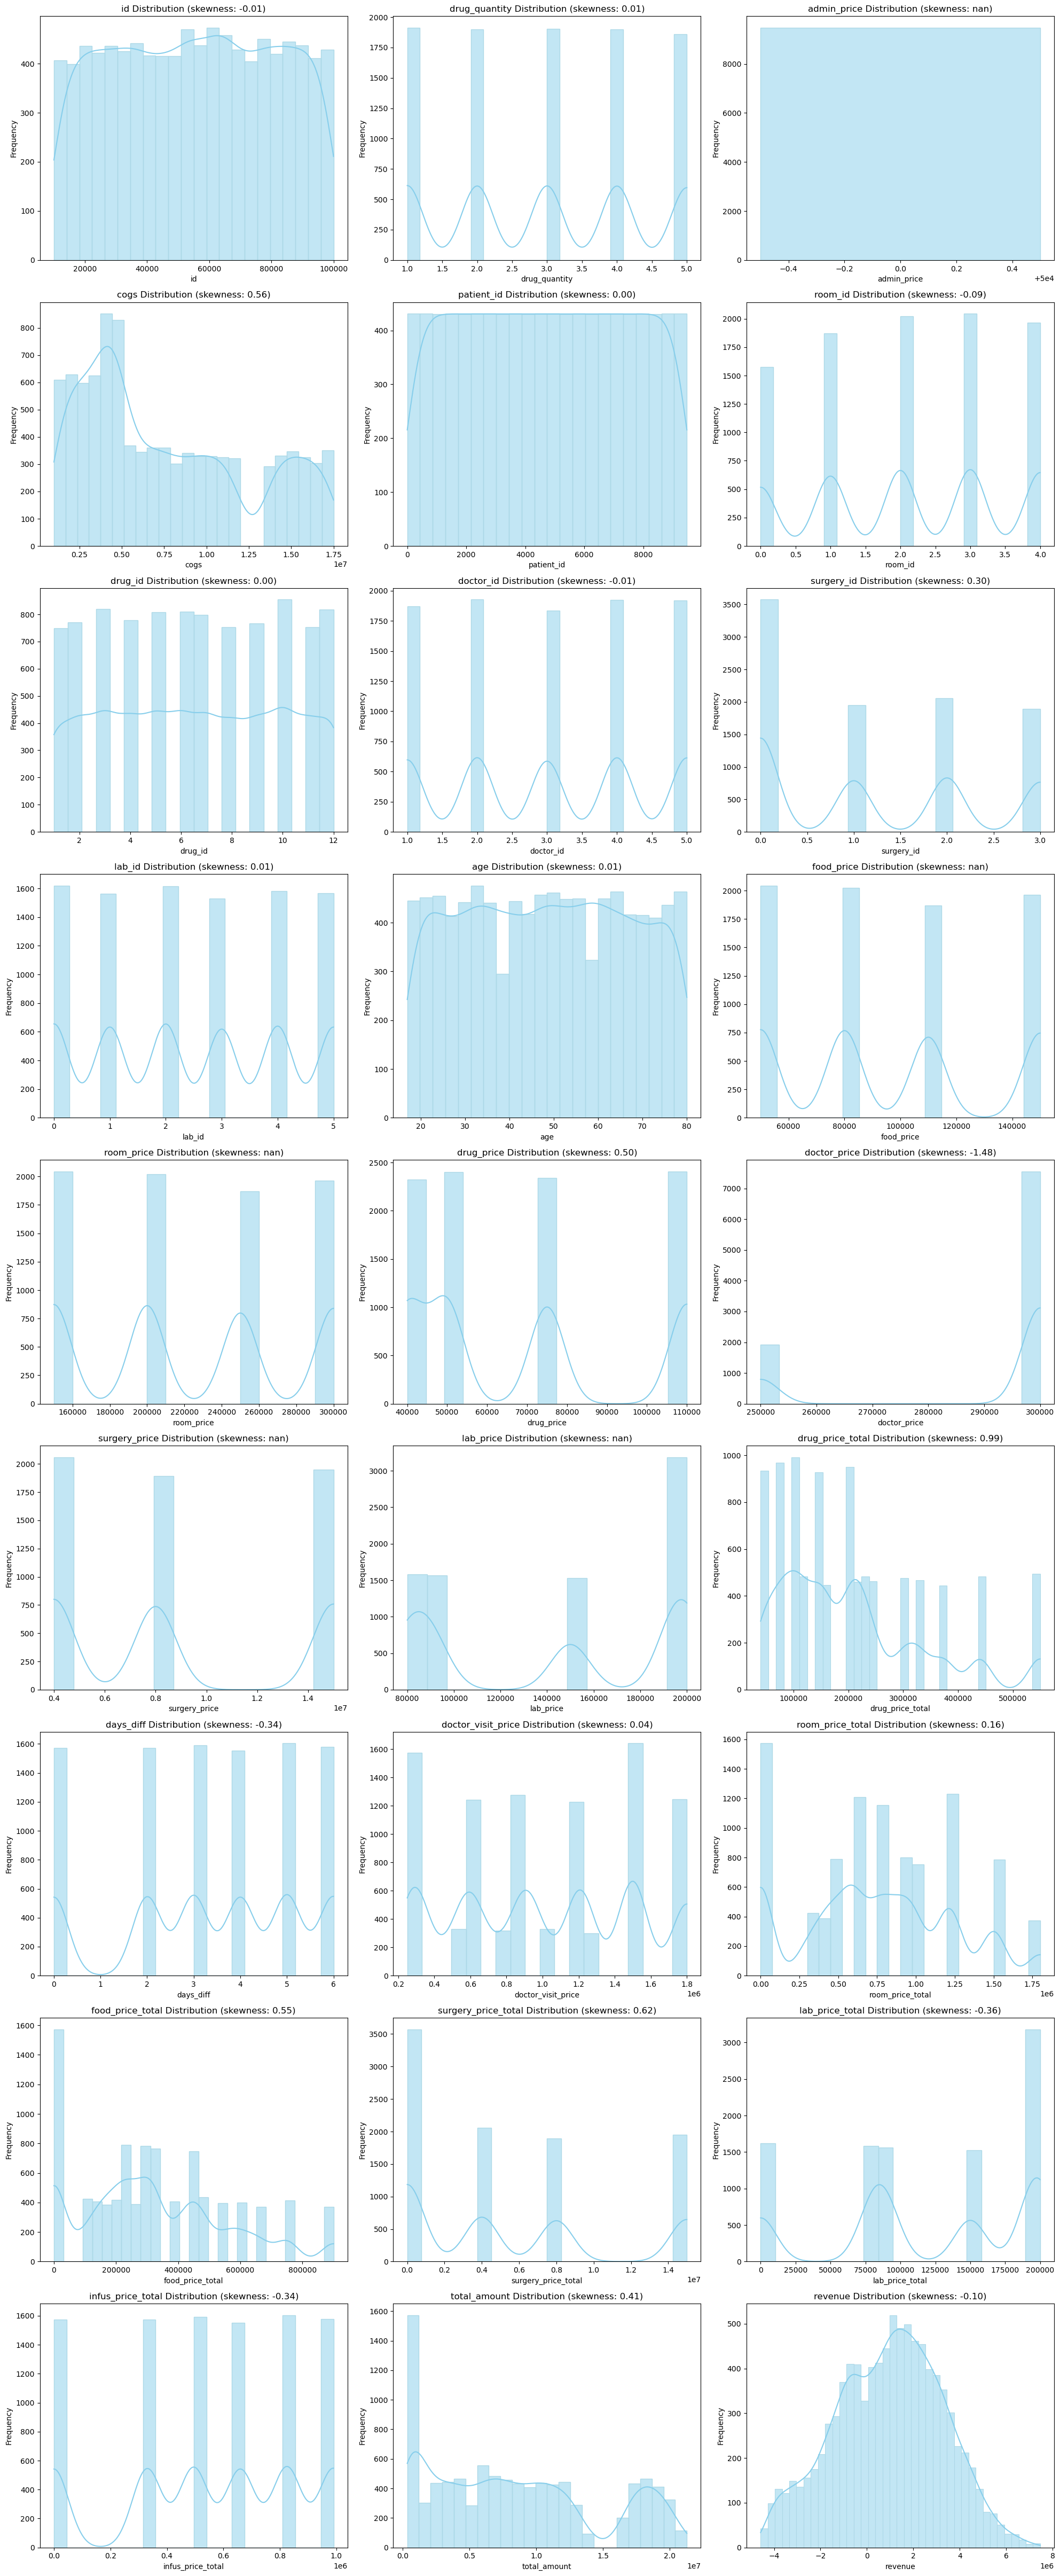

In [13]:
# Create gridspec layout
grid = gridspec.GridSpec(15, 3)
plt.figure(figsize=(20, 20*4))

# Loop through each numerical column
for i, column in enumerate(nums):
    ax = plt.subplot(grid[i])
    skewness = skew(df[column])
    sns.histplot(data=df, x=column, kde=True, color='skyblue', edgecolor='lightblue', ax=ax)
    ax.set_title(f'{column} Distribution (skewness: {skewness:.2f})')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

### Categorical columns

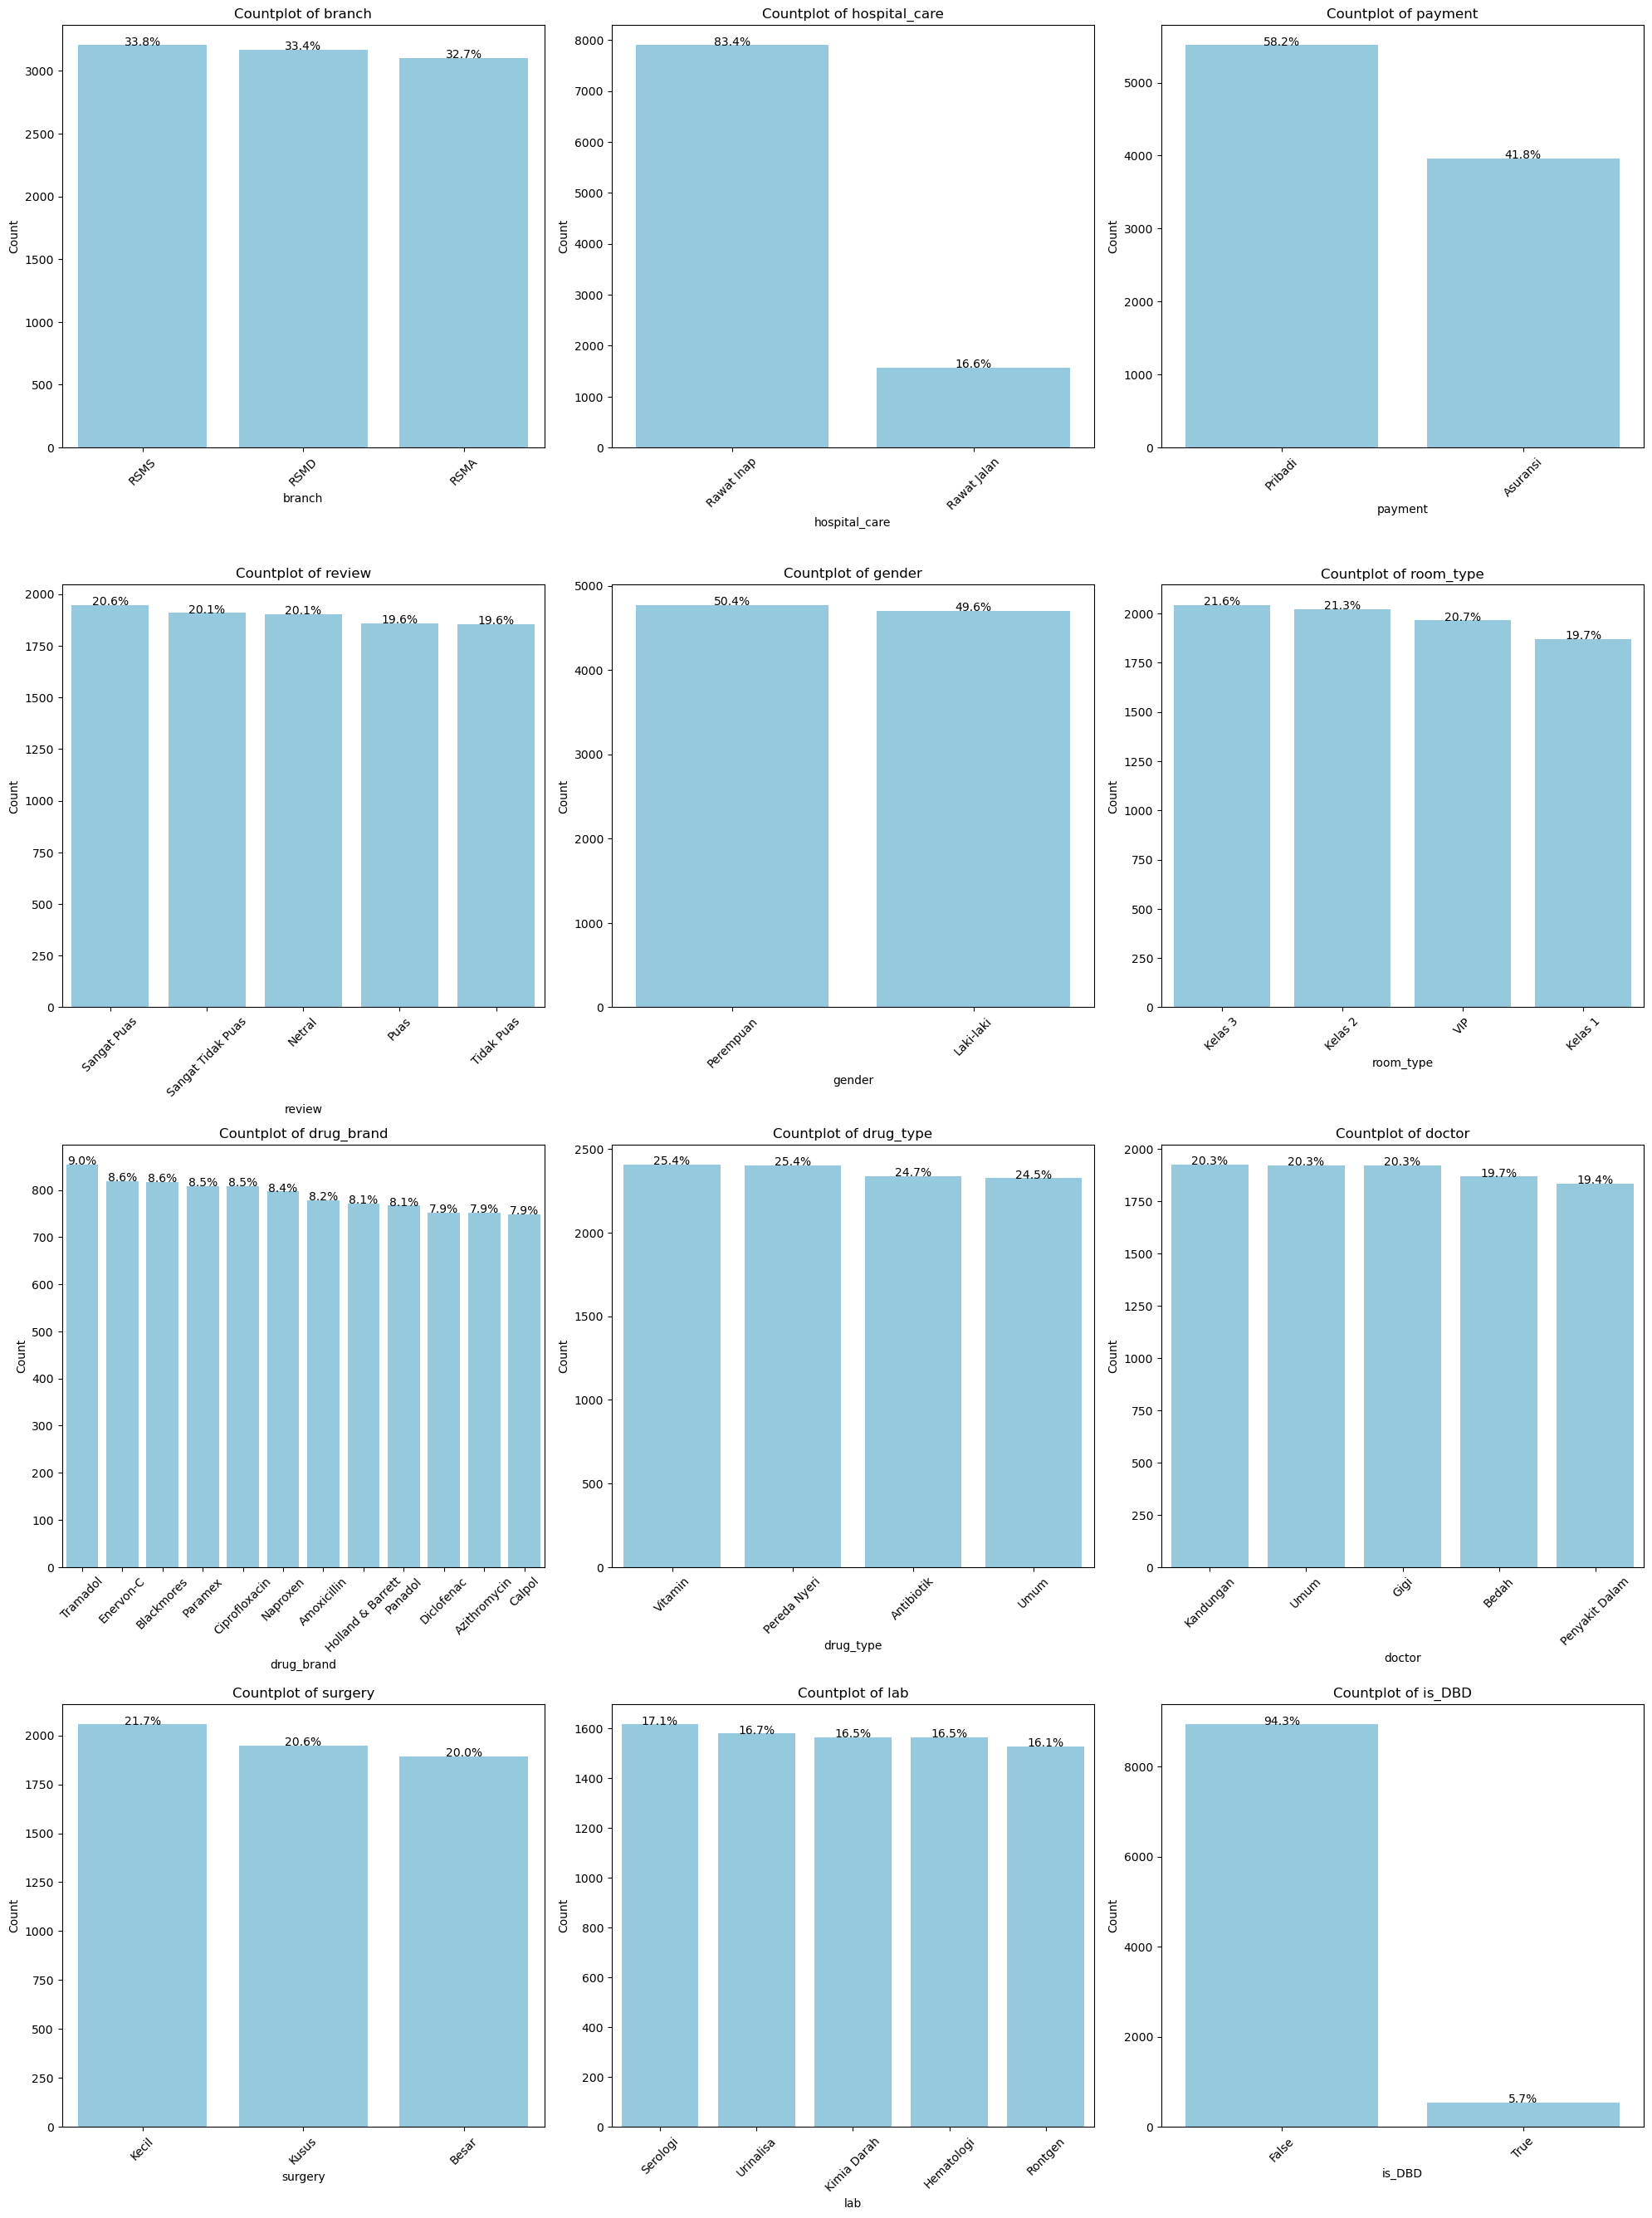

In [14]:
# List of categorical columns
cat_cols = [col for col in cats if col != 'patient_name']

# Create gridspec layout
grid = gridspec.GridSpec(15, 3)
plt.figure(figsize=(20, 20*5))

# Loop through categorical features and plot bar charts
for i, feature in enumerate(cat_cols):
    ax = plt.subplot(grid[i])
    sns.countplot(data=df, x=feature, ax=ax, order=df[feature].value_counts().index, color='skyblue')
    ax.set_title(f'Countplot of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
    # Calculate percentages and annotate bars
    total = float(len(df[feature]))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + 0.02
        ax.annotate(percentage, (x, y), ha='center')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

## Bivariate Analysis

### Numerical columns

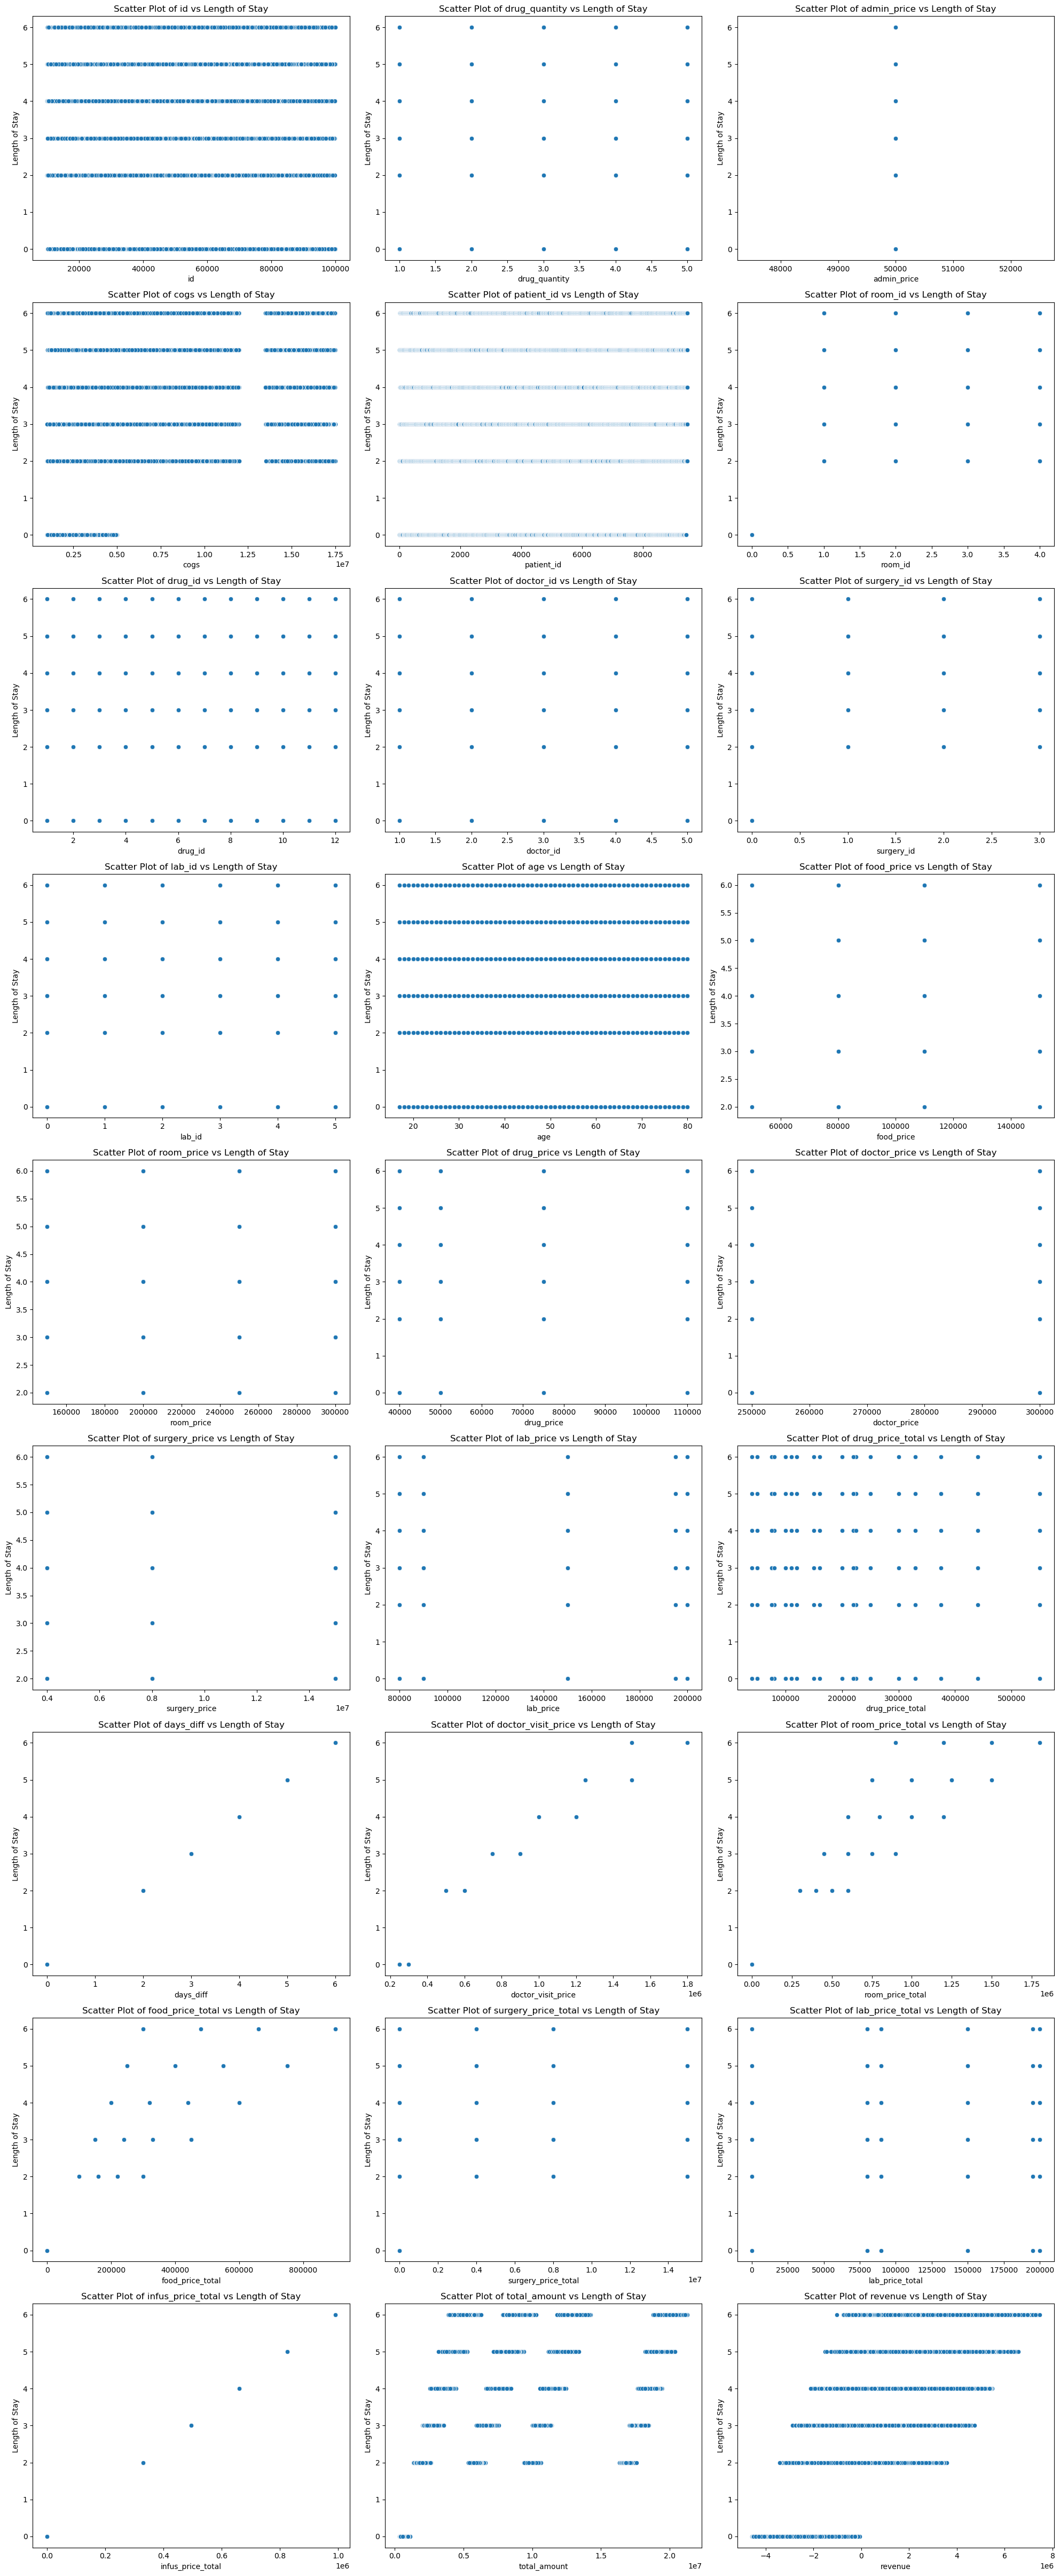

In [15]:
# Create grid of subplots
grid = gridspec.GridSpec(15, 3)
plt.figure(figsize=(20, 20*4))

# Plot scatter plots
for n, col in enumerate(nums):
    ax = plt.subplot(grid[n])
    sns.scatterplot(x=col, y='days_diff', data=df, ax=ax)
    ax.set_title(f'Scatter Plot of {col} vs Length of Stay')
    ax.set_xlabel(col)
    ax.set_ylabel('Length of Stay')

plt.tight_layout()
plt.show()

### Categorical columns

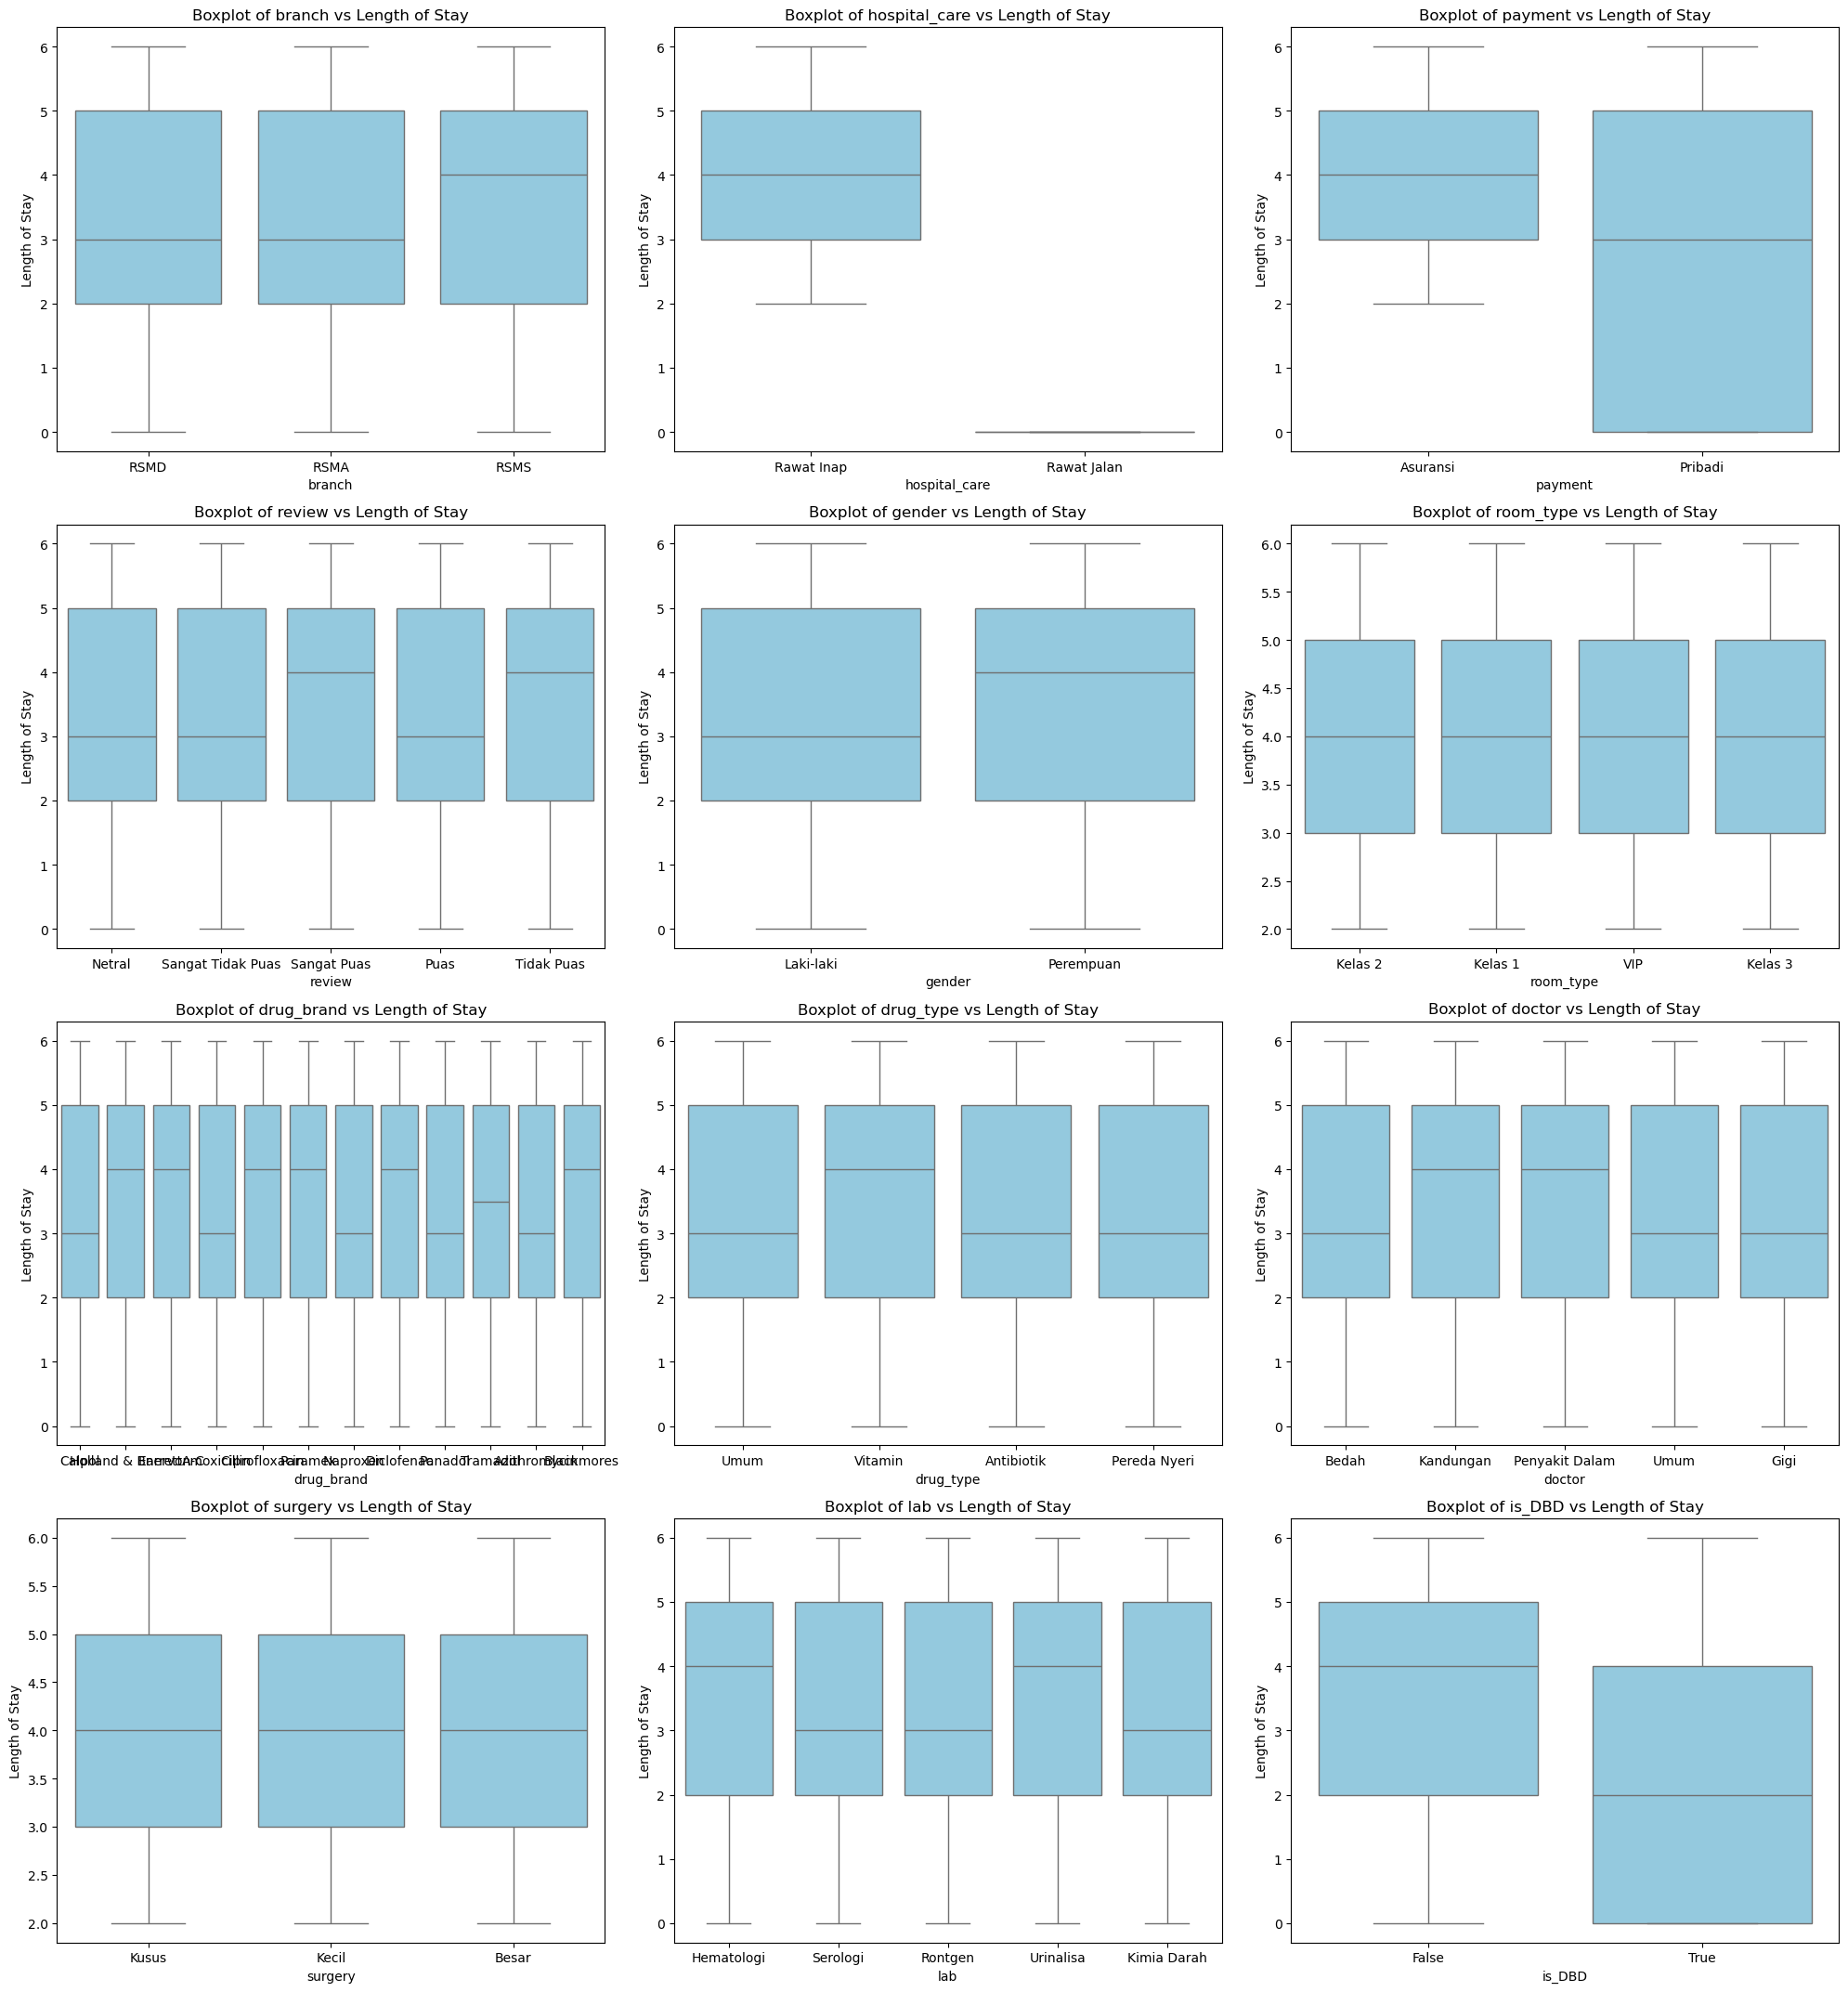

In [16]:
# Create gridspec layout
grid = gridspec.GridSpec(15, 3)
plt.figure(figsize=(20, 20*4))

# Plot box plots for each categorical column against 'days_diff'
for i, col in enumerate(cat_cols):
    ax = plt.subplot(grid[i])
    sns.boxplot(x=col, y='days_diff', data=df, ax=ax, color='skyblue')
    ax.set_title(f'Boxplot of {col} vs Length of Stay')
    ax.set_xlabel(col)
    ax.set_ylabel('Length of Stay')

plt.tight_layout()
plt.show()

## Multivariate Analysis

### Numerical columns

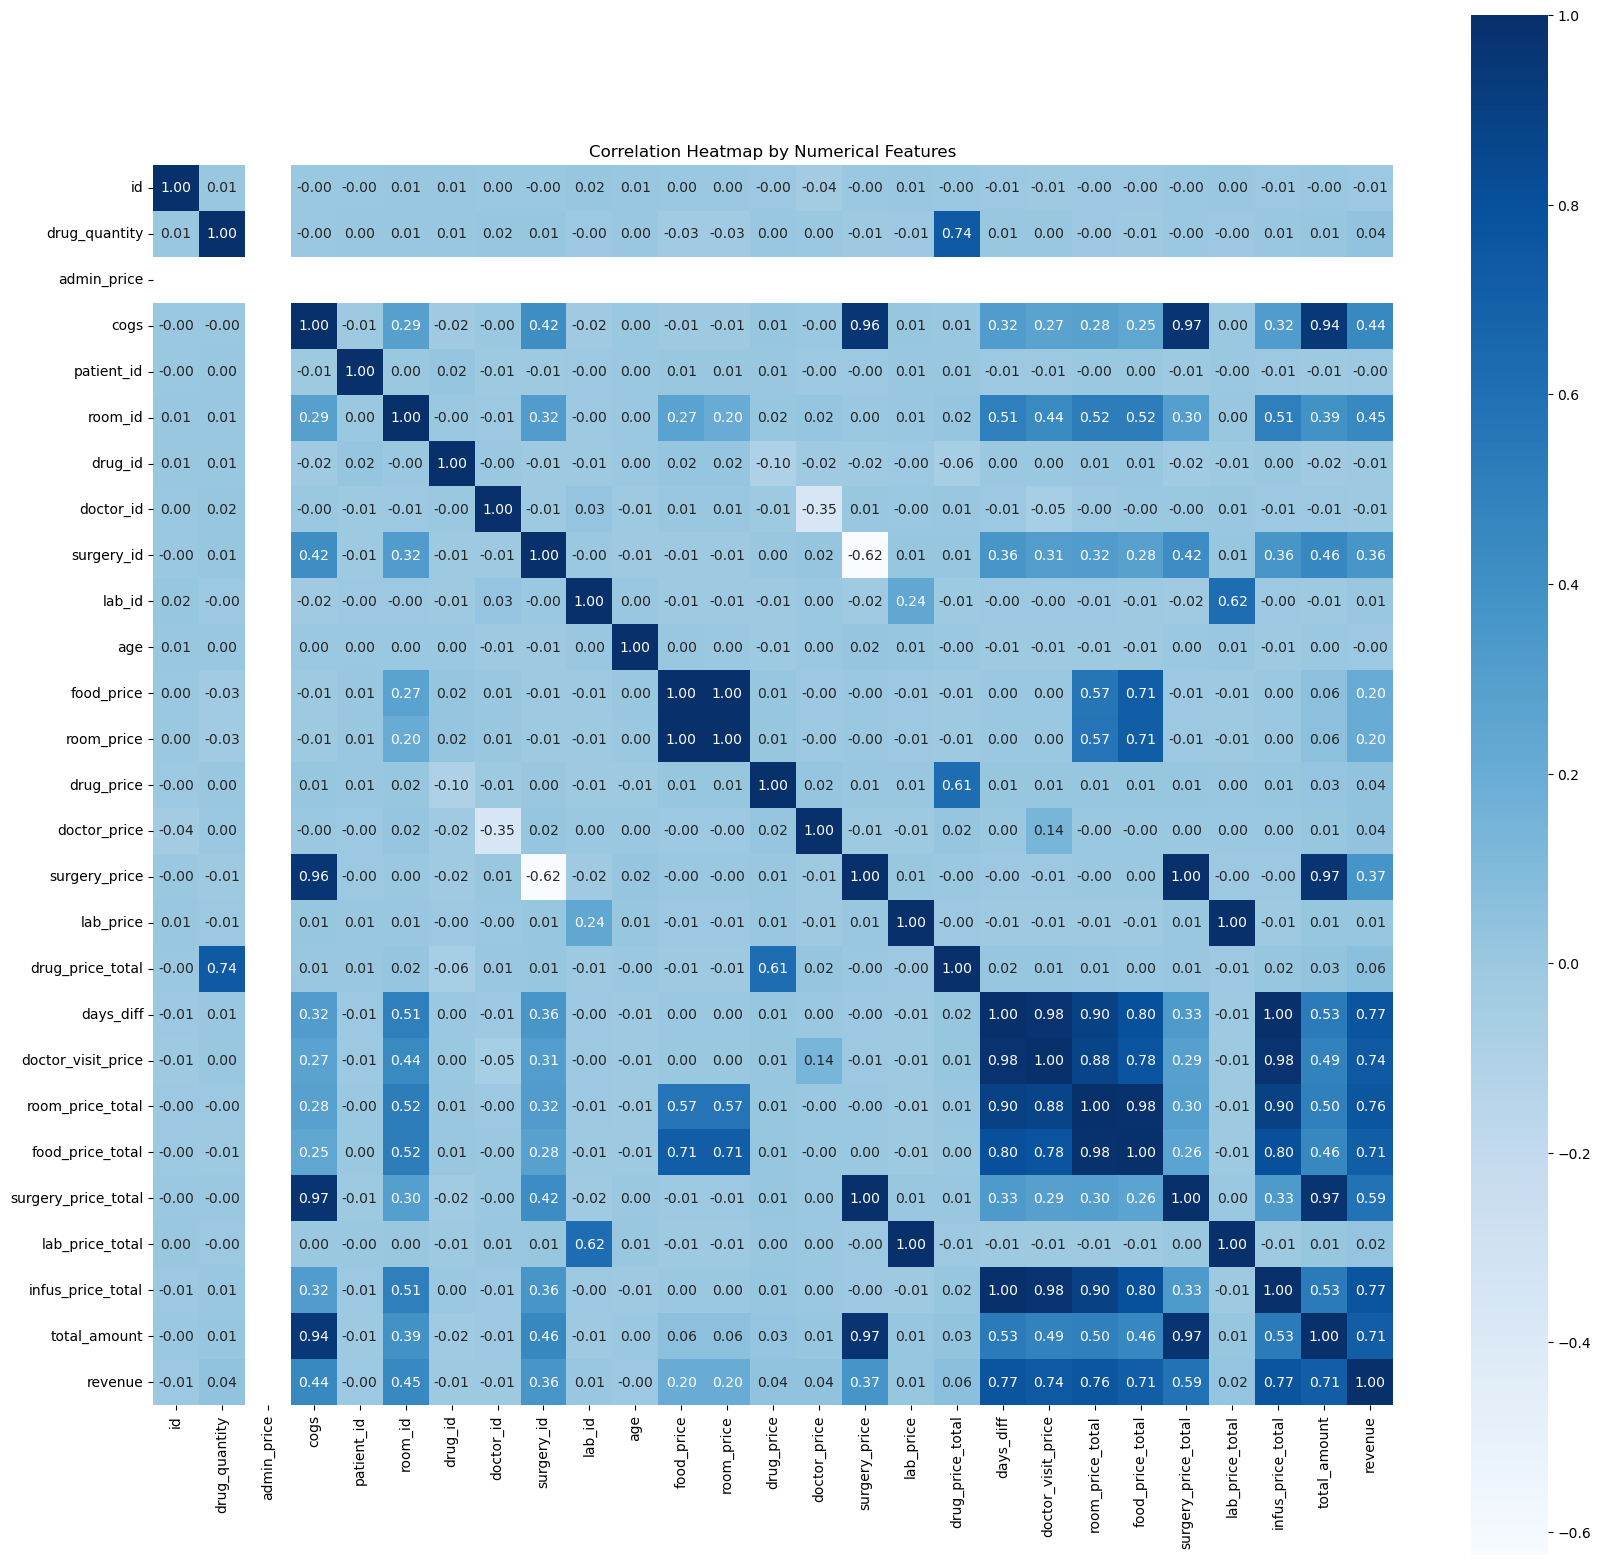

In [17]:
# Subset the DataFrame with only the numerical features
numerical_df = df[nums]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', square=True)
plt.title('Correlation Heatmap by Numerical Features')
plt.show()

### Categorical columns

In [18]:
from scipy.stats import chi2_contingency

# Create a contingency table for each combination of categorical variable and the target variable
chi_square_results = {}

for column in cat_cols:
    contingency_table = pd.crosstab(df[column], df['total_amount'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi_square_results[column] = {'chi2': chi2, 'p-value': p}

# Display the results
for column, result in chi_square_results.items():
    print(f"Chi-square test for {column} vs {'total_amount'}:")
    print(f"Chi-square value: {result['chi2']}")
    print(f"P-value: {result['p-value']}")
    print('-' * 30)

Chi-square test for branch vs total_amount:
Chi-square value: 5768.777985701364
P-value: 0.12056746104533834
------------------------------
Chi-square test for hospital_care vs total_amount:
Chi-square value: 9474.0
P-value: 0.0
------------------------------
Chi-square test for payment vs total_amount:
Chi-square value: 4097.338123867272
P-value: 8.646478536871219e-51
------------------------------
Chi-square test for review vs total_amount:
Chi-square value: 11214.360383082043
P-value: 0.6867766444104829
------------------------------
Chi-square test for gender vs total_amount:
Chi-square value: 2753.550706785415
P-value: 0.8185096879300776
------------------------------
Chi-square test for room_type vs total_amount:
Chi-square value: 13527.814218816202
P-value: 5.358513029960084e-271
------------------------------
Chi-square test for drug_brand vs total_amount:
Chi-square value: 36575.15643339877
P-value: 2.5434345665108553e-98
------------------------------
Chi-square test for drug

In [19]:
column_to_drop = ['id', 'patient_id', 'room_id', 'drug_id', 'doctor_id', 'surgery_id', 'lab_id', 'patient_name', 'created_at',
                 'admin_price', 'drug_price_total', 'doctor_visit_price', 'room_price_total', 'food_price_total',
                  'surgery_price_total', 'lab_price_total', 'infus_price_total', 'revenue', 'cogs']

## Data Cleansing

In [20]:
# Menghitung jumlah NaN atau nilai yang kosong
print("Missing Values")
print(df.isnull().sum())

#Check for missing values Percentage
print("\nMissing Values Percentage")
print(df.isna().sum()/len(df))

Missing Values
id                        0
date_in                   0
date_out                  0
branch                    0
hospital_care             0
drug_quantity             0
admin_price               0
cogs                      0
payment                   0
review                    0
patient_id                0
room_id                   0
drug_id                   0
doctor_id                 0
surgery_id                0
lab_id                    0
patient_name              0
gender                    0
age                       0
room_type              1573
food_price             1573
room_price             1573
drug_brand                0
drug_type                 0
drug_price                0
doctor                    0
doctor_price              0
surgery                3573
surgery_price          3573
lab                    1620
lab_price              1620
drug_price_total          0
days_diff                 0
doctor_visit_price        0
room_price_total          0
food_

In [21]:
# Fill missing values in categorical columns
categorical_cols = ["room_type", "surgery", "lab"]
df[categorical_cols] = df[categorical_cols].fillna("Tidak Digunakan")

# Fill missing values in numerical columns
numerical_cols = ["food_price", "room_price", "surgery_price", "lab_price"]
df[numerical_cols] = df[numerical_cols].fillna(0)

In [22]:
print("Missing Values")
print(df.isnull().sum())

Missing Values
id                     0
date_in                0
date_out               0
branch                 0
hospital_care          0
drug_quantity          0
admin_price            0
cogs                   0
payment                0
review                 0
patient_id             0
room_id                0
drug_id                0
doctor_id              0
surgery_id             0
lab_id                 0
patient_name           0
gender                 0
age                    0
room_type              0
food_price             0
room_price             0
drug_brand             0
drug_type              0
drug_price             0
doctor                 0
doctor_price           0
surgery                0
surgery_price          0
lab                    0
lab_price              0
drug_price_total       0
days_diff              0
doctor_visit_price     0
room_price_total       0
food_price_total       0
surgery_price_total    0
lab_price_total        0
infus_price_total      0
total_amou

In [23]:
df.duplicated().sum()

0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9474 entries, 0 to 9473
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   9474 non-null   int64         
 1   date_in              9474 non-null   datetime64[ns]
 2   date_out             9474 non-null   datetime64[ns]
 3   branch               9474 non-null   object        
 4   hospital_care        9474 non-null   object        
 5   drug_quantity        9474 non-null   int64         
 6   admin_price          9474 non-null   int64         
 7   cogs                 9474 non-null   int64         
 8   payment              9474 non-null   object        
 9   review               9474 non-null   object        
 10  patient_id           9474 non-null   int64         
 11  room_id              9474 non-null   int64         
 12  drug_id              9474 non-null   int64         
 13  doctor_id            9474 non-nul

In [25]:
# # Filtering Outliers using Z-score
# # Penjelasan: Filtering hanya dilakukan pada kolom
# # Kolom-kolom ini diharapkan menjadi fitur yang akan digunakan pada pemodelan dan dapat memprediksi 

# from scipy import stats

# print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

# filtered_entries = np.array([True] * len(df))

# for col in ['drug_quantity','cogs','room_price','food_price','drug_price', 'doctor_price', 'surgery_price']:
#     zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
#     filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
# df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

# print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

## Feature Engineering

In [26]:
# Define age groups
age_bins = [0, 18, 30, 45, 60, float('inf')]
age_labels = ['0-18', '19-30', '31-45', '46-60', '60+']

# Assign age groups to the data
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

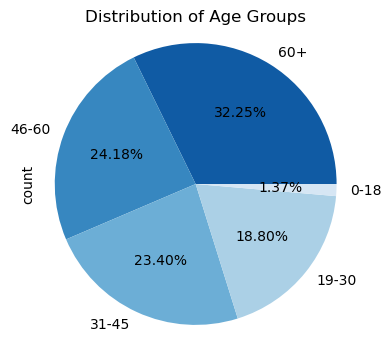

In [27]:
# Plot the pie chart
custom_palette = sns.color_palette('Blues_r', len(df['age_group'].unique()))
plt.figure(figsize=(4, 4))
df['age_group'].value_counts().plot(kind='pie', autopct='%.2f%%', colors=custom_palette)
plt.title('Distribution of Age Groups')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


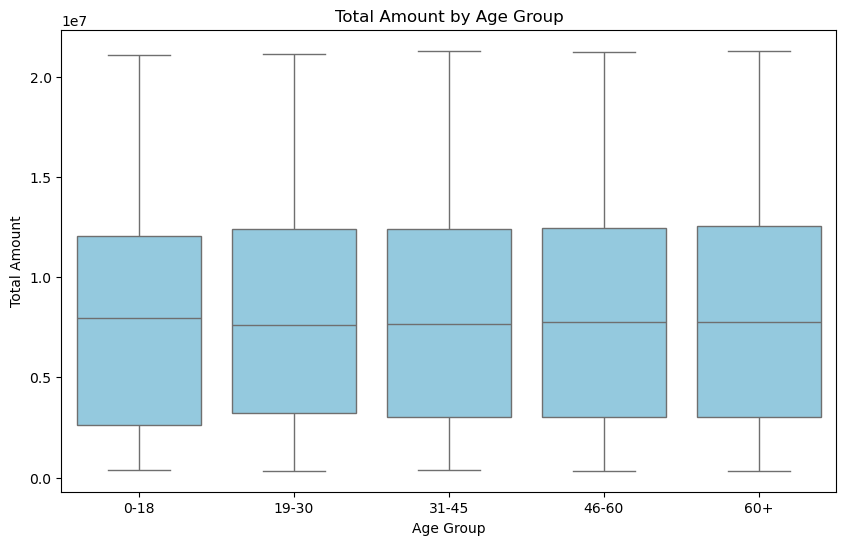

In [28]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='total_amount', data=df, color='skyblue')
plt.title('Total Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.show()

In [29]:
df_copy = df
df_copy['date_in_year'] = df_copy['date_in'].dt.year
df_copy['date_in_year']

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
9469    2023
9470    2023
9471    2023
9472    2023
9473    2023
Name: date_in_year, Length: 9474, dtype: int32

In [30]:
df_copy['date_in_month'] = df_copy['date_in'].dt.month
df_copy['date_in_month']

0        1
1        1
2        1
3        1
4        1
        ..
9469    12
9470    12
9471    12
9472    12
9473    12
Name: date_in_month, Length: 9474, dtype: int32

In [31]:
df_copy['date_out_year'] = df_copy['date_out'].dt.year
df_copy['date_out_year']

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
9469    2024
9470    2024
9471    2024
9472    2024
9473    2024
Name: date_out_year, Length: 9474, dtype: int32

In [32]:
df_copy['date_out_month'] = df_copy['date_out'].dt.month
df_copy['date_out_month']

0       1
1       1
2       1
3       1
4       1
       ..
9469    1
9470    1
9471    1
9472    1
9473    1
Name: date_out_month, Length: 9474, dtype: int32

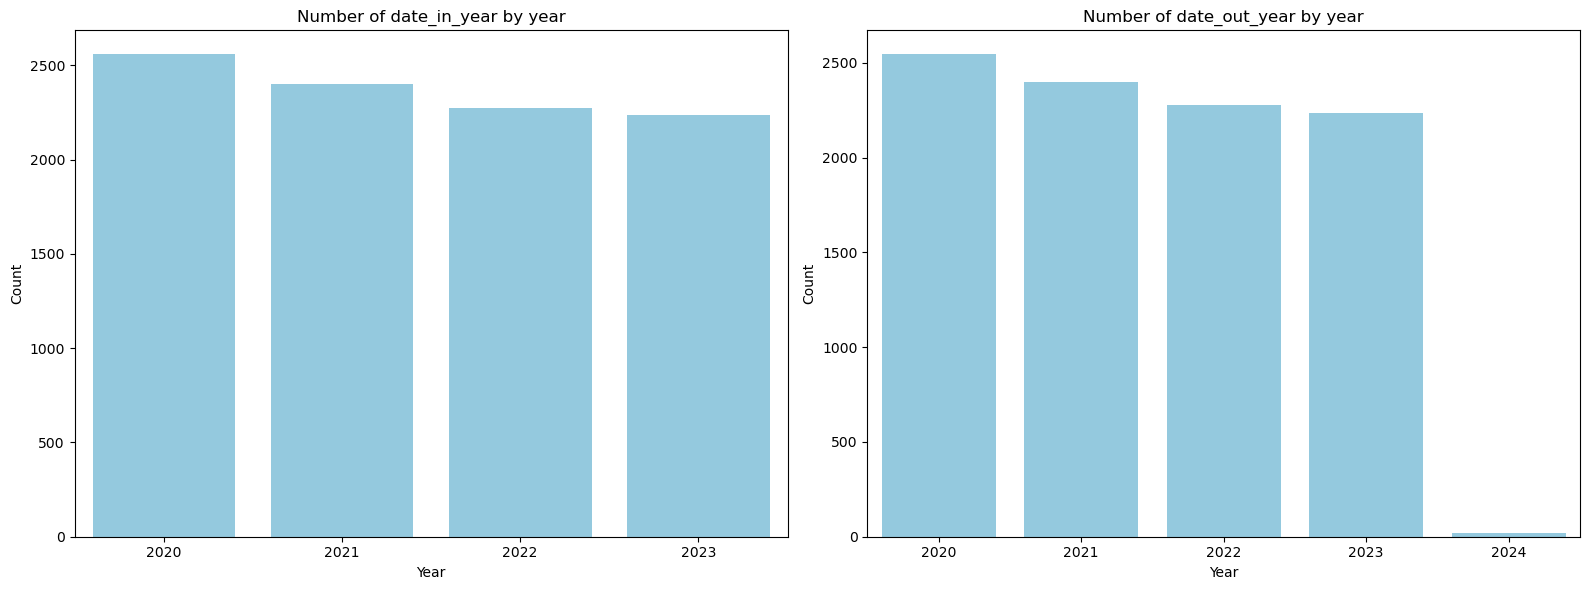

In [33]:
# List of columns to visualize
date_columns = ['date_in_year', 'date_out_year']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(date_columns), figsize=(16, 6))

# Loop through date_columns and plot countplots
for i, column in enumerate(date_columns):
    sns.countplot(x=df_copy[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Number of {column} by year')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

### label encoding untuk data ordinal

In [34]:
# label encode is_DBD
df['is_DBD'] = df['is_DBD'].astype(int)

# Label encode (mapping) age_group
age_mapping = {'0-18': 0, '19-30': 1, '31-45': 2, '46-60': 3, '60+': 4}
df['age_group'] = df['age_group'].replace(age_mapping).astype(int)

# Label encode (mapping) review
review_mapping = {'Sangat Tidak Puas': 0, 'Tidak Puas': 1, 'Netral': 2, 'Puas': 3, 'Sangat Puas': 4}
df['review_encoded'] = df['review'].replace(review_mapping).astype(int)

# Label encode (mapping) room_type
room_mapping = {'Tidak Digunakan': 0, 'Kelas 3': 1, 'Kelas 2': 2, 'Kelas 1': 3, 'VIP': 4}
df['room_type_encoded'] = df['room_type'].replace(room_mapping).astype(int)

# Label encode (mapping) surgery
surgery_mapping = {'Tidak Digunakan': 0, 'Kecil': 1, 'Besar': 2, 'Kusus': 3}
df['surgery_encoded'] = df['surgery'].replace(surgery_mapping).astype(int)

### One-hot encoding (data non-ordinal)

In [35]:
# One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder

onehot_cols = ['branch', 'hospital_care', 'payment', 'gender', 'drug_brand', 'drug_type', 'doctor', 'lab']

for col in onehot_cols:
    onehots = pd.get_dummies(df[col], prefix=col, dtype=int)  # Specify dtype=int to convert to integers
    df = df.join(onehots)
    df = df.drop(col, axis=1)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9474 entries, 0 to 9473
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            9474 non-null   int64         
 1   date_in                       9474 non-null   datetime64[ns]
 2   date_out                      9474 non-null   datetime64[ns]
 3   drug_quantity                 9474 non-null   int64         
 4   admin_price                   9474 non-null   int64         
 5   cogs                          9474 non-null   int64         
 6   review                        9474 non-null   object        
 7   patient_id                    9474 non-null   int64         
 8   room_id                       9474 non-null   int64         
 9   drug_id                       9474 non-null   int64         
 10  doctor_id                     9474 non-null   int64         
 11  surgery_id                    

In [37]:
correlation = df[['age', 'age_group', 'date_in_year', 'date_in_month', 'date_out_year', 'date_out_month']].corrwith(df['total_amount'])
correlation_sorted = correlation.sort_index()

print(correlation_sorted)

age               0.000259
age_group         0.000699
date_in_month    -0.011389
date_in_year     -0.008134
date_out_month   -0.016274
date_out_year    -0.005004
dtype: float64


In [38]:
column_to_drop = column_to_drop + ['date_in', 'date_out', 'age', 
                                   'hospital_care_Rawat Jalan', 'gender_Perempuan', 'payment_Pribadi',
                                   'review', 'room_type', 'surgery',
                                   'date_in_month', 'date_in_year', 'date_out_year', 'date_out_month',
                                   # 'review_encoded'
                                  ]

In [39]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# calculate correlation and print correlation_sorted
correlation = df.select_dtypes(include=[np.number]).corrwith(df['days_diff'])
#correlation_sorted = correlation.sort_index()
correlation_sorted = correlation.abs().sort_values(ascending=False)

print(correlation_sorted)

# Reset display options to default after printing
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

days_diff                       1.000000
infus_price_total               1.000000
doctor_visit_price              0.977612
room_price_total                0.897259
food_price_total                0.798630
revenue                         0.765979
hospital_care_Rawat Inap        0.755538
hospital_care_Rawat Jalan       0.755538
room_price                      0.644314
food_price                      0.550815
total_amount                    0.531014
room_id                         0.511231
room_type_encoded               0.506213
surgery_id                      0.359202
surgery_encoded                 0.358611
surgery_price_total             0.332988
surgery_price                   0.332988
cogs                            0.317179
payment_Pribadi                 0.283888
payment_Asuransi                0.283888
is_DBD                          0.137613
drug_price_total                0.015562
date_in_month                   0.013473
date_out_month                  0.013422
drug_type_Vitami

In [40]:
# column_to_drop = column_to_drop + ['doctor_price', 'drug_price', 'food_price', 'lab_price', 'room_price', 'surgery_price']

## Feature Selection

In [41]:
final_df = df.drop(column_to_drop, axis=1)
final_df.head()

,drug_quantity,food_price,room_price,drug_price,doctor_price,surgery_price,lab_price,days_diff,total_amount,is_DBD,...,doctor_Gigi,doctor_Kandungan,doctor_Penyakit Dalam,doctor_Umum,lab_Hematologi,lab_Kimia Darah,lab_Rontgen,lab_Serologi,lab_Tidak Digunakan,lab_Urinalisa
0,4,80000.0,200000.0,40000,300000,15000000.0,90000.0,3.0,17535000,0,...,0,0,0,0,1,0,0,0,0,0
1,1,110000.0,250000.0,110000,300000,15000000.0,200000.0,5.0,19485000,0,...,0,0,0,0,0,0,0,1,0,0
2,5,0.0,0.0,110000,300000,0.0,90000.0,0.0,990000,0,...,0,0,0,0,1,0,0,0,0,0
3,2,150000.0,300000.0,75000,300000,4000000.0,150000.0,5.0,8925000,0,...,0,0,0,0,0,0,1,0,0,0
4,3,150000.0,300000.0,75000,300000,0.0,200000.0,2.0,2305000,0,...,0,1,0,0,0,0,0,1,0,0


In [42]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# calculate correlation and print correlation_sorted
correlation = final_df.corrwith(df['total_amount'])
#correlation_sorted = correlation.sort_index()
correlation_sorted = correlation.abs().sort_values(ascending=False)

print(correlation_sorted)

# Reset display options to default after printing
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

total_amount                    1.000000
surgery_price                   0.973543
surgery_encoded                 0.970839
hospital_care_Rawat Inap        0.563902
days_diff                       0.531014
room_price                      0.505003
food_price                      0.442681
room_type_encoded               0.412018
is_DBD                          0.248772
payment_Asuransi                0.203333
drug_type_Vitamin               0.029468
drug_price                      0.026080
drug_brand_Enervon-C            0.025133
review_encoded                  0.018024
lab_Urinalisa                   0.017493
lab_Serologi                    0.017423
branch_RSMD                     0.017400
doctor_Kandungan                0.016376
drug_brand_Tramadol             0.015710
drug_brand_Azithromycin         0.014544
drug_brand_Panadol              0.014254
doctor_price                    0.014137
doctor_Umum                     0.014137
drug_brand_Blackmores           0.013779
drug_quantity   

In [43]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Separate features and target
X = final_df.drop('total_amount', axis=1)
y = final_df['total_amount']

In [44]:
# Initialize the MinMaxScaler
mms = MinMaxScaler()
X_mms = mms.fit_transform(X)

## Machine Learning Modeling and Evaluation

In [45]:
# splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mms, y, test_size=0.2, random_state=42)

In [46]:
X_train.shape, X_test.shape

((7579, 46), (1895, 46))

In [47]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_val_score

# regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
}

# Loop through the models
for name, model in models.items():
    # Perform cross-validation
    cv_scores_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # Train the model on the entire training set
    model.fit(X_train, y_train)

    # Predictions on the training set
    y_pred_train = model.predict(X_train)

    # Predictions on the test set
    y_pred_test = model.predict(X_test)

    # Calculate evaluation metrics for training and test sets
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    print(f'--------{name} Regression------')
    print("Cross-Validation R²: %.5f (+/- %.5f)" % (cv_scores_r2.mean(), cv_scores_r2.std() * 2))
    print("Training R²: %.5f" % r2_train)
    print("Test R²: %.5f" % r2_test)
    print("Training MSE: %.5f" % mse_train)
    print("Test MSE: %.5f" % mse_test)
    print("Training RMSE: %.5f" % np.sqrt(mse_train))
    print("Test RMSE: %.5f" % np.sqrt(mse_test))
    print("Training MAPE: %.5f" % (mape_train * 100) + '%')
    print("Test MAPE: %.5f" % (mape_test * 100) + '%')

--------Linear Regression Regression------
Cross-Validation R²: 0.99956 (+/- 0.00004)
Training R²: 0.99957
Test R²: 0.99956
Training MSE: 16896379697.99076
Test MSE: 16877198293.20950
Training RMSE: 129986.07502
Test RMSE: 129912.27153
Training MAPE: 2.73210%
Test MAPE: 2.79988%
--------Decision Tree Regression------
Cross-Validation R²: 0.99975 (+/- 0.00003)
Training R²: 1.00000
Test R²: 0.99981
Training MSE: 0.00000
Test MSE: 7260395778.36412
Training RMSE: 0.00000
Test RMSE: 85207.95607
Training MAPE: 0.00000%
Test MAPE: 0.85759%
--------KNN Regression------
Cross-Validation R²: 0.74532 (+/- 0.01710)
Training R²: 0.82800
Test R²: 0.75920
Training MSE: 6757424466552.31543
Test MSE: 9321843382058.04688
Training RMSE: 2599504.65792
Test RMSE: 3053169.39950
Training MAPE: 33.25105%
Test MAPE: 42.95108%
--------SVR Regression------
Cross-Validation R²: -0.01788 (+/- 0.00484)
Training R²: -0.01793
Test R²: -0.00850
Training MSE: 39990741949895.89844
Test MSE: 39040400869682.42188
Training

## Hyperparameter Tuning Random Search

In [48]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
models_tuning = {
    'Linear Regression': (LinearRegression(), {'fit_intercept': [True, False]}),
    'Decision Tree': (DecisionTreeRegressor(), {'max_depth': [None, 10, 20, 30]}),
    'KNN': (KNeighborsRegressor(), {'n_neighbors': [3, 5, 7]}),
    'SVR': (SVR(), {'C': [1, 10, 100]}),
    'Random Forest': (RandomForestRegressor(), {'n_estimators': [100, 200],
                                               'max_depth': [None, 10, 20]}),
    'XGBoost': (XGBRegressor(), {'max_depth': [None, 2, 3, 6]}),
}

# Loop through the models
for name, (model, param_grid) in models_tuning.items():
    # Create a randomized search for the model
    random_search = RandomizedSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    random_search.fit(X_train, y_train)

    # Get the best hyperparameters and model
    best_params = random_search.best_params_
    best_model = random_search.best_estimator_

    # Train the best model on the entire training set
    best_model.fit(X_train, y_train)

    # Predictions on the training set
    y_pred_train = best_model.predict(X_train)

    # Predictions on the test set
    y_pred_test = best_model.predict(X_test)

    # Calculate evaluation metrics for training and test sets
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    print(f'--------{name} Regression (Tuned)------')
    print("Best Hyperparameters:", best_params)
    print("Training R²: %.5f" % r2_train)
    print("Test R²: %.5f" % r2_test)
    print("Training MSE: %.5f" % mse_train)
    print("Test MSE: %.5f" % mse_test)
    print("Training RMSE: %.5f" % np.sqrt(mse_train))
    print("Test RMSE: %.5f" % np.sqrt(mse_test))
    print("Training MAPE: %.5f" % (mape_train * 100) + '%')
    print("Test MAPE: %.5f" % (mape_test * 100) + '%')

--------Linear Regression Regression (Tuned)------
Best Hyperparameters: {'fit_intercept': False}
Training R²: 0.99957
Test R²: 0.99956
Training MSE: 16895831819.73807
Test MSE: 16877140934.09831
Training RMSE: 129983.96755
Test RMSE: 129912.05077
Training MAPE: 2.73308%
Test MAPE: 2.80124%
--------Decision Tree Regression (Tuned)------
Best Hyperparameters: {'max_depth': 30}
Training R²: 1.00000
Test R²: 0.99981
Training MSE: 0.00000
Test MSE: 7191029023.74670
Training RMSE: 0.00000
Test RMSE: 84799.93528
Training MAPE: 0.00000%
Test MAPE: 0.84833%
--------KNN Regression (Tuned)------
Best Hyperparameters: {'n_neighbors': 7}
Training R²: 0.82512
Test R²: 0.78004
Training MSE: 6870254922436.05469
Test MSE: 8514791198912.28320
Training RMSE: 2621117.11345
Test RMSE: 2918011.51453
Training MAPE: 36.26873%
Test MAPE: 44.66357%
--------SVR Regression (Tuned)------
Best Hyperparameters: {'C': 100}
Training R²: -0.01330
Test R²: -0.00385
Training MSE: 39809007182489.29688
Test MSE: 388606378

## Deployment